# HDBSCAN: basic demo

In [1]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = np.load('./input/clusterable_data.npy')

In [3]:
data.shape

(2309, 2)

In [4]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

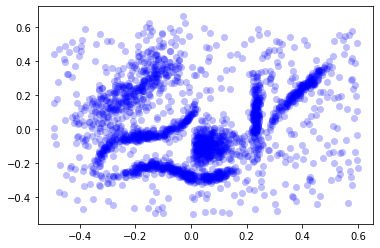

In [5]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)

In [7]:
color_palette = sns.color_palette('husl', 6)
color_palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [8]:
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

In [9]:
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

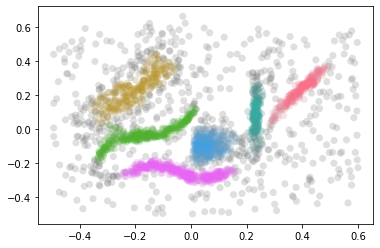

In [10]:
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)